In [47]:
%matplotlib inline
import pandas
from sklearn import linear_model
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (30, 12)
plt.rcParams.update({'font.size': 22})

df = pandas.read_csv('../data-sample/ready/d00_single.csv')
df = df.drop(['AQS_Code', 'Latitude', 'Longitude', 'epoch', 'day'], axis=1)


df['winddirvar'] = df['winddir'].rolling(12).std()

for i in range(0, 12):
    df = df.drop(df.index[[0]])


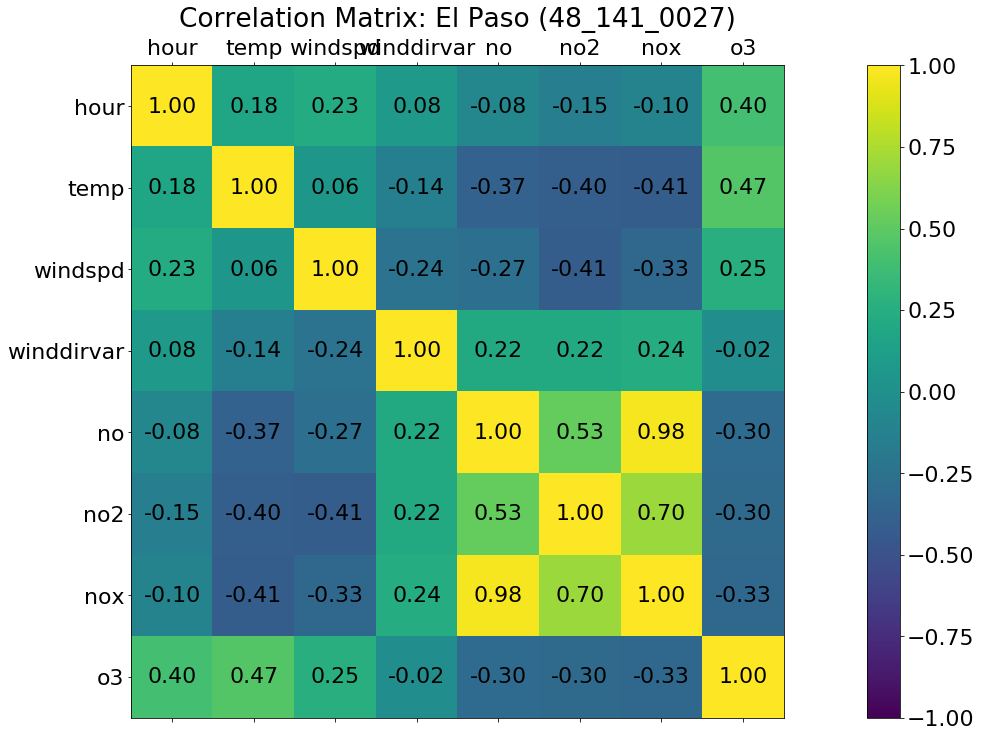

In [46]:
features = ['hour', 'temp', 'windspd', 'winddirvar', 'no', 'no2', 'nox', 'o3']

correlations = data[features].corr()

# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

xticks = np.arange(0,len(features),1)
yticks = np.arange(0,len(features),1)

for (i, j), z in np.ndenumerate(correlations):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')


ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_xticklabels(features)
ax.set_yticklabels(features)
plt.title('Correlation Matrix: El Paso (48_141_0027)')
plt.show()